In [2]:
# This script is used to run the detection script in the BounceInsight module.
import sys
import os
current_dir = os.path.dirname(os.path.abspath('__file__'))
print(f'Current Directory: {current_dir}')
root_dir = os.path.abspath(os.path.join(current_dir, '..'))

if os.path.exists(root_dir):
    print(f'Root Directory exists: {root_dir}')
else:
    print(f'Root Directory does NOT exist: {root_dir}')
    

if root_dir not in sys.path:
    sys.path.append(root_dir)
    
try:
    from BounceInsight import BounceInsight
    print("Successfully imported BounceInsight")
except ModuleNotFoundError as e:
    print(f"BounceInsight module not found. Please check the module path. {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    
try:
    %reload_ext autoreload
except:
    %load_ext autoreload

%autoreload 2
    
csv_path = os.path.abspath(os.path.join(current_dir, 'files/loader'))
insight = BounceInsight(csv_path, "bounce")

Current Directory: /Users/timomauricespengler/Desktop/BounceInsight
Root Directory exists: /Users/timomauricespengler/Desktop
Successfully imported BounceInsight


Dip detected: False


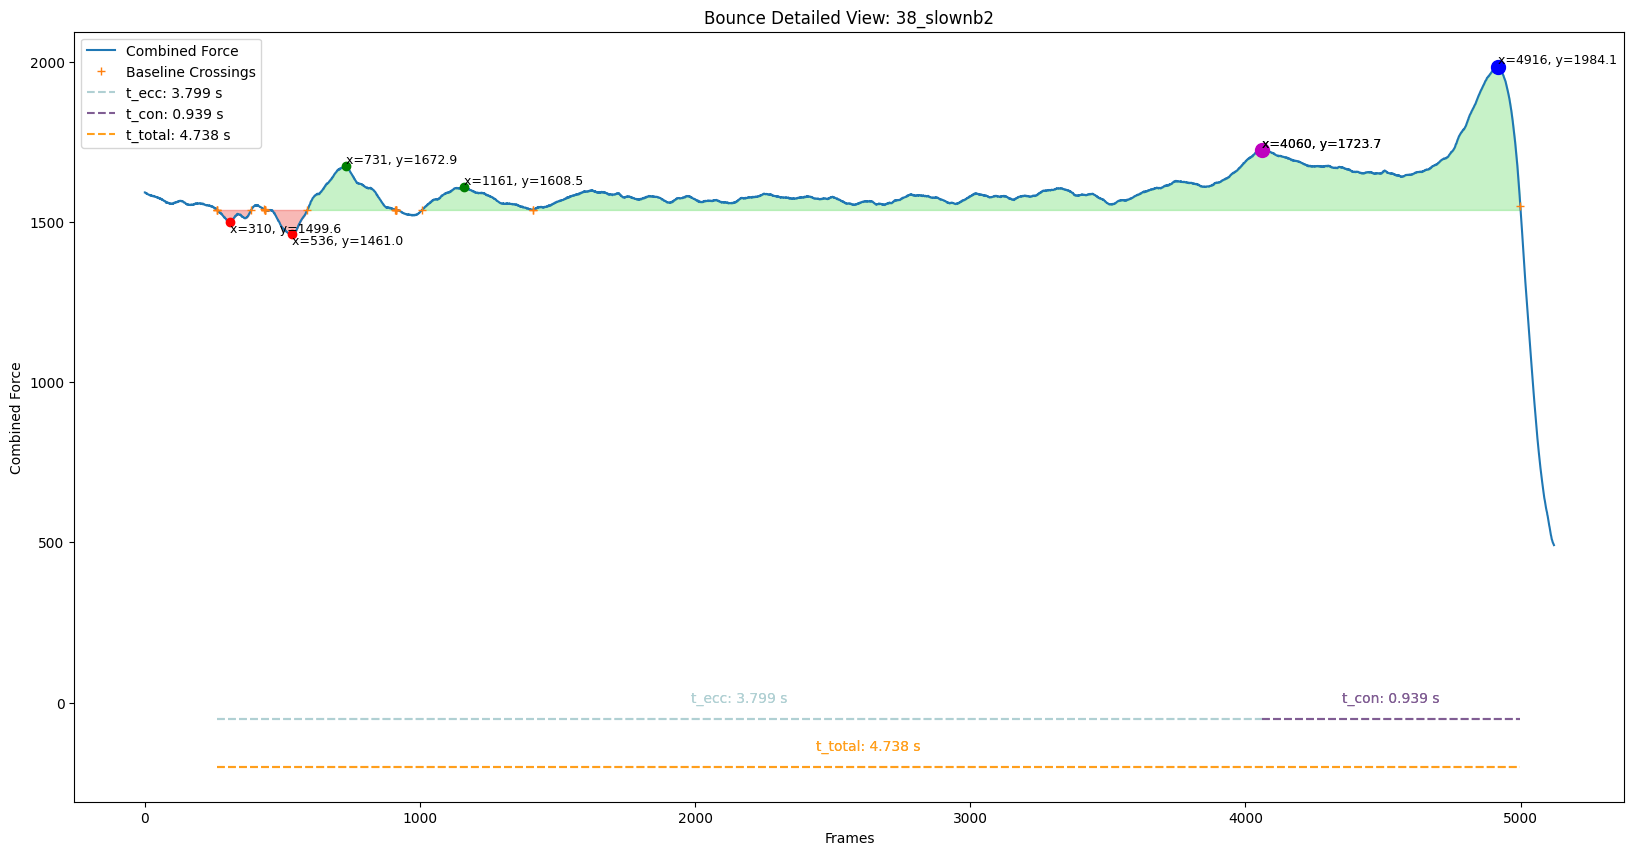

{'fps': 1000, 'source': 'fp', 'device': 'fp3d', 'gender': 'f', 'load': 85.0, 'bodyweight': 71.7}
Dip detected: False


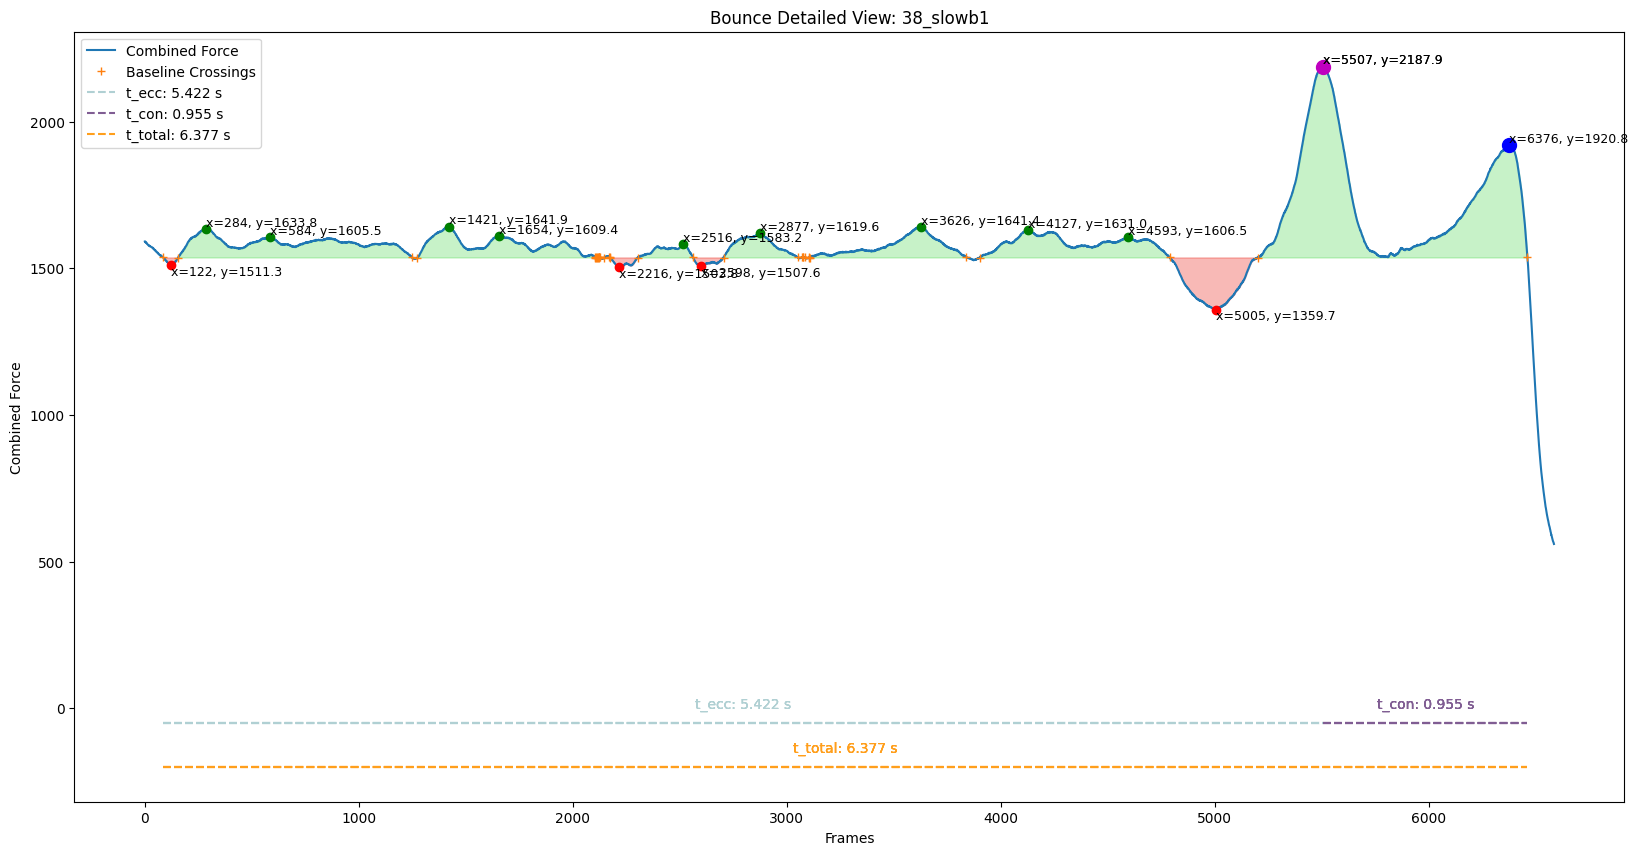

{'fps': 1000, 'source': 'fp', 'device': 'fp3d', 'gender': 'f', 'load': 85.0, 'bodyweight': 71.7}


In [5]:
insight.plot_data(file_name='38_slownb2')
insight.plot_data(file_name='38_slowb1')

In [3]:
insight.analyse_bounce(id=38, plot=False)

Finished 38_bounce70b2.csv: 100%|██████████| 23/23 [00:01<00:00, 12.50it/s]   

Number of bounce files in bounce_dict_70: 3
Number of bounce files in no_bounce_dict_70: 3
Number of bounce files in bounce_dict_80: 3
Number of bounce files in no_bounce_dict_80: 3
Number of bounce files in bounce_dict_slow: 3
Number of bounce files in no_bounce_dict_slow: 3
Number of bounce files in bounce_dict_fast: 3
Number of bounce files in no_bounce_dict_fast: 2


Results saved to validation/validation_results.csv
Visualized validation results saved to validation/validation_results.xlsx
Validation complete
Total points: 775
Points within limits: 750 (96.77%)
Points outside limits: 25 (3.23%)
The data is good (more than 95% points within limits of agreement).
Mean 0.11230838709677421, STD 0.22911055873356206
Lower limit: -0.3367483080210074, Upper limit: 0.5613650822145558, Span: 0.8981133902355632


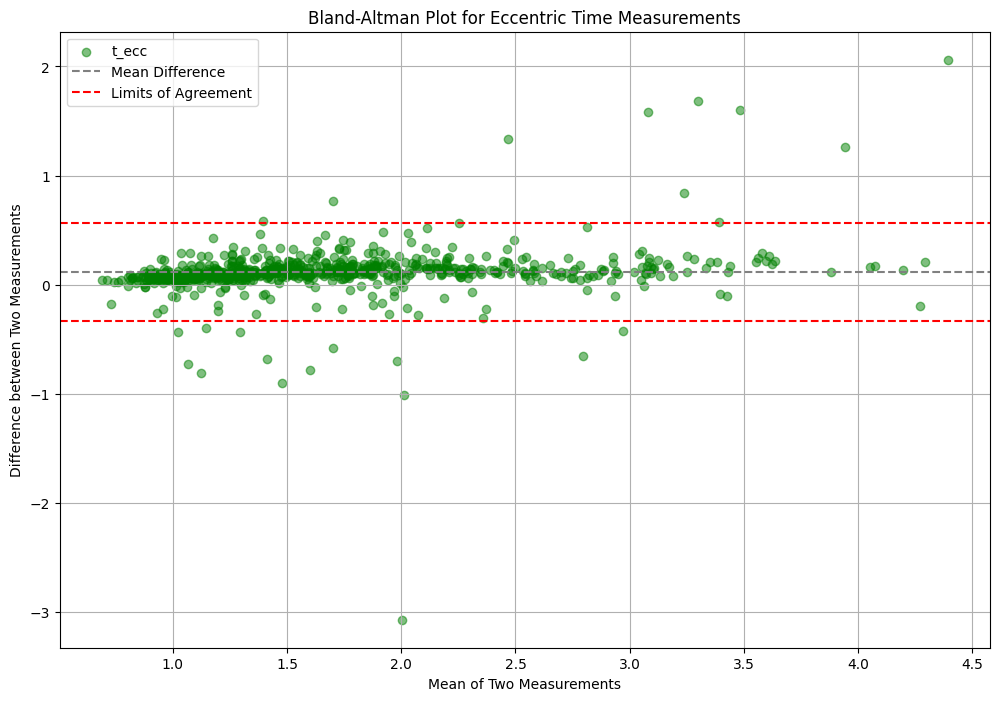

Total points: 775
Points within limits: 761 (98.19%)
Points outside limits: 14 (1.81%)
The data is good (more than 95% points within limits of agreement).
Mean -0.14026064516129033, STD 0.15253234178332914
Lower limit: -0.43922403505661545, Upper limit: 0.15870274473403478, Span: 0.5979267797906502


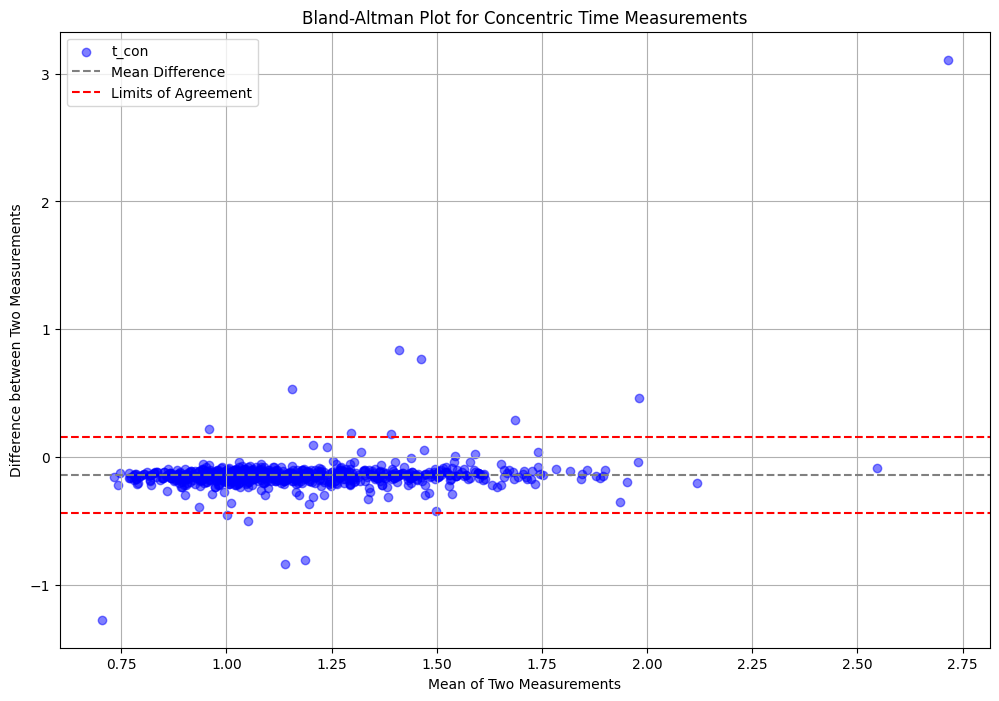

Total points: 775
Points within limits: 743 (95.87%)
Points outside limits: 32 (4.13%)
The data is good (more than 95% points within limits of agreement).
Mean -0.0710490322580645, STD 0.1857325240744428
Lower limit: -0.4350847794439724, Upper limit: 0.29298671492784334, Span: 0.7280714943718157


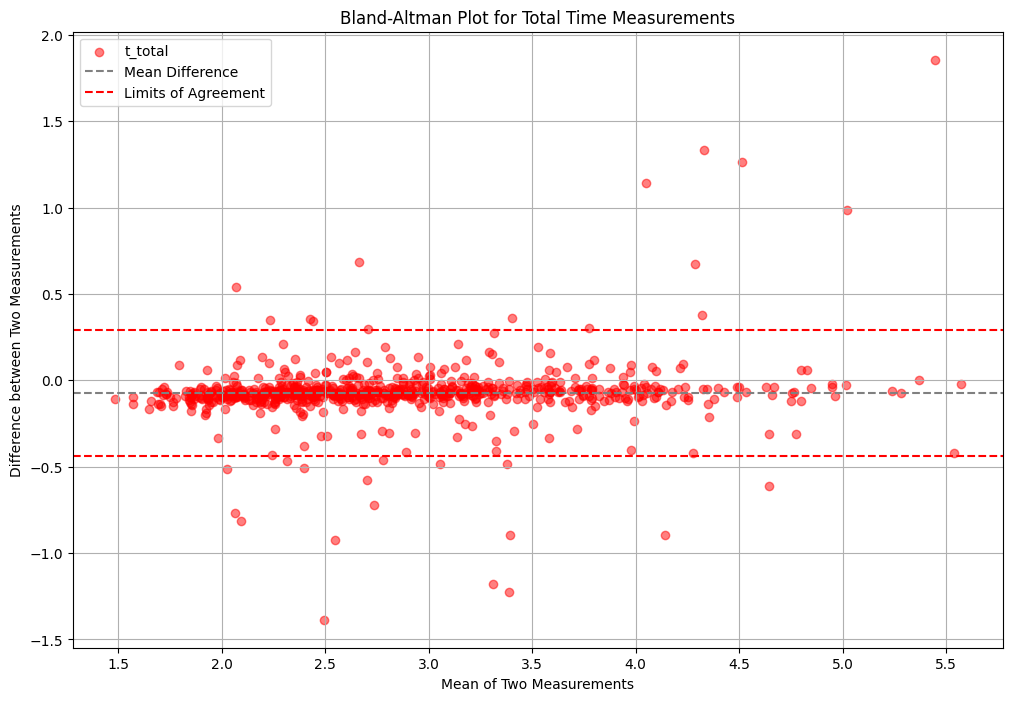

Total points: 775
Points within limits: 729 (94.06%)
Points outside limits: 46 (5.94%)
The data is not good (less than 95% points within limits of agreement).
Mean 57.384953494575605, STD 117.79179942548204
Lower limit: -173.4869733793692, Upper limit: 288.2568803685204, Span: 461.7438537478896


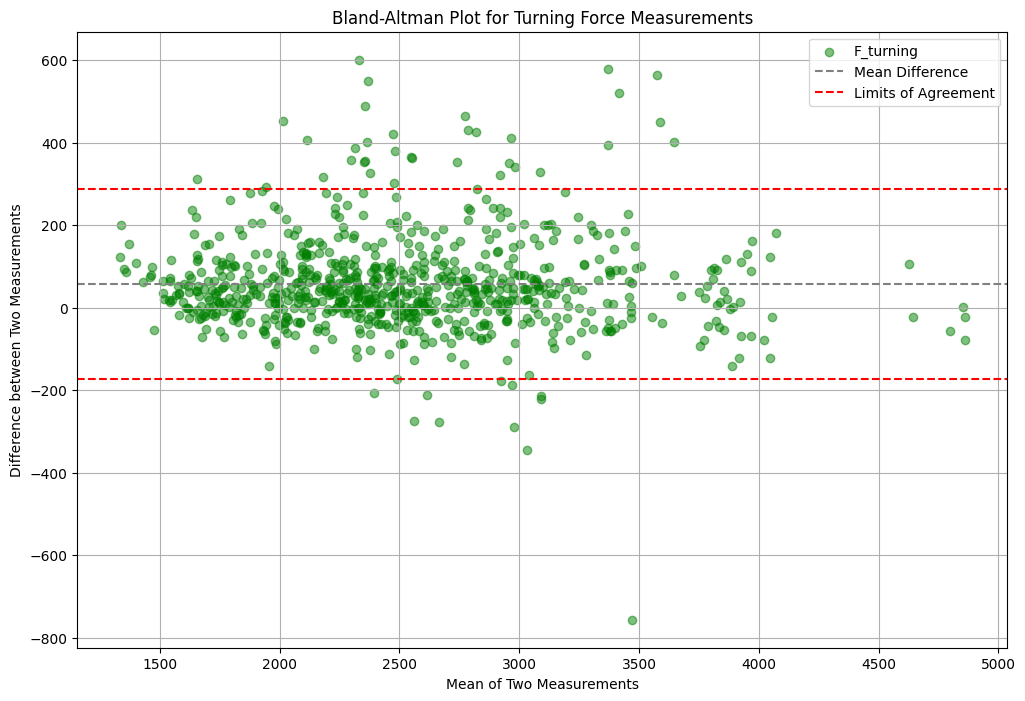

Total points: 775
Points within limits: 736 (94.97%)
Points outside limits: 39 (5.03%)
The data is not good (less than 95% points within limits of agreement).
Mean -282.3364827193732, STD 326.403177981302
Lower limit: -922.0867115627251, Upper limit: 357.41374612397874, Span: 1279.5004576867038


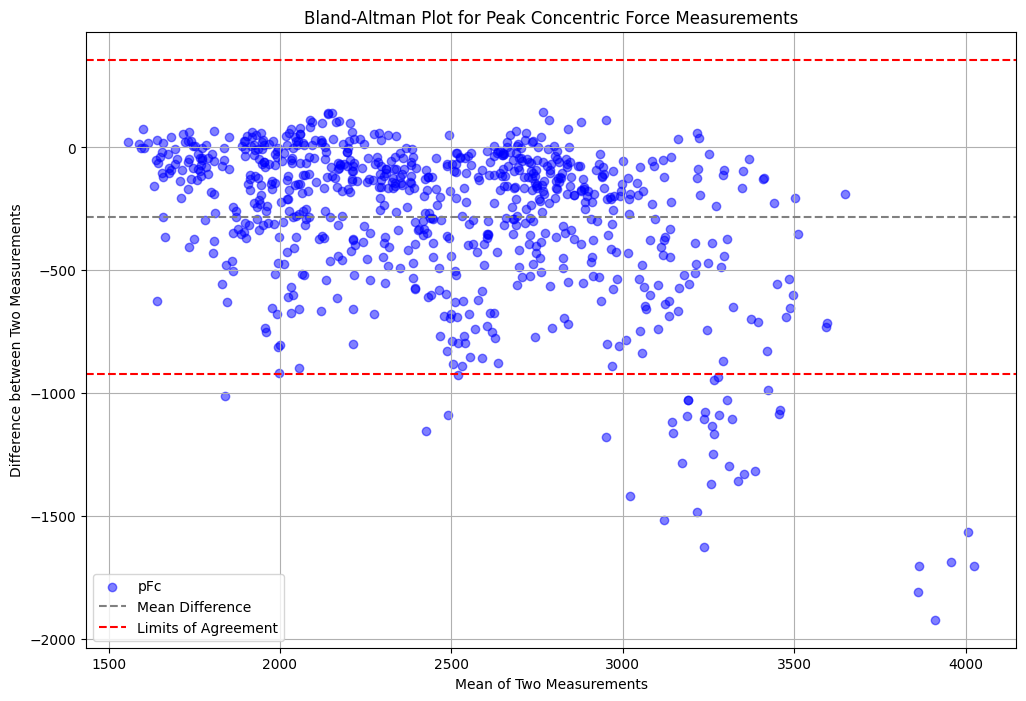

Total points: 775
Points within limits: 733 (94.58%)
Points outside limits: 42 (5.42%)
The data is not good (less than 95% points within limits of agreement).
Mean 212.5646962979167, STD 64.00939315383788
Lower limit: 87.10628571639447, Upper limit: 338.02310687943896, Span: 250.9168211630445


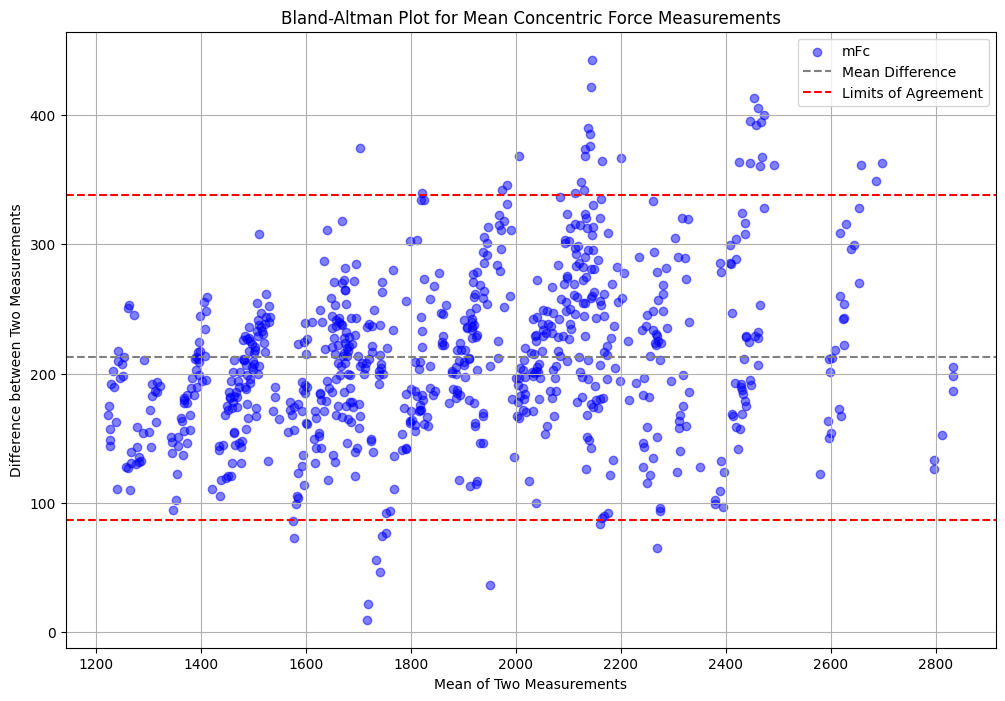

Correlation for t_ecc: 0.95, p-value < 0.001
Correlation for t_con: 0.84, p-value < 0.001
Correlation for t_total: 0.97, p-value < 0.001
Correlation for F_turning: 0.98, p-value < 0.001
Correlation for pFc: 0.83, p-value < 0.001
Correlation for mFc: 0.99, p-value < 0.001


In [15]:
insight.validate(tolerance=0.05)

Dip detected: True


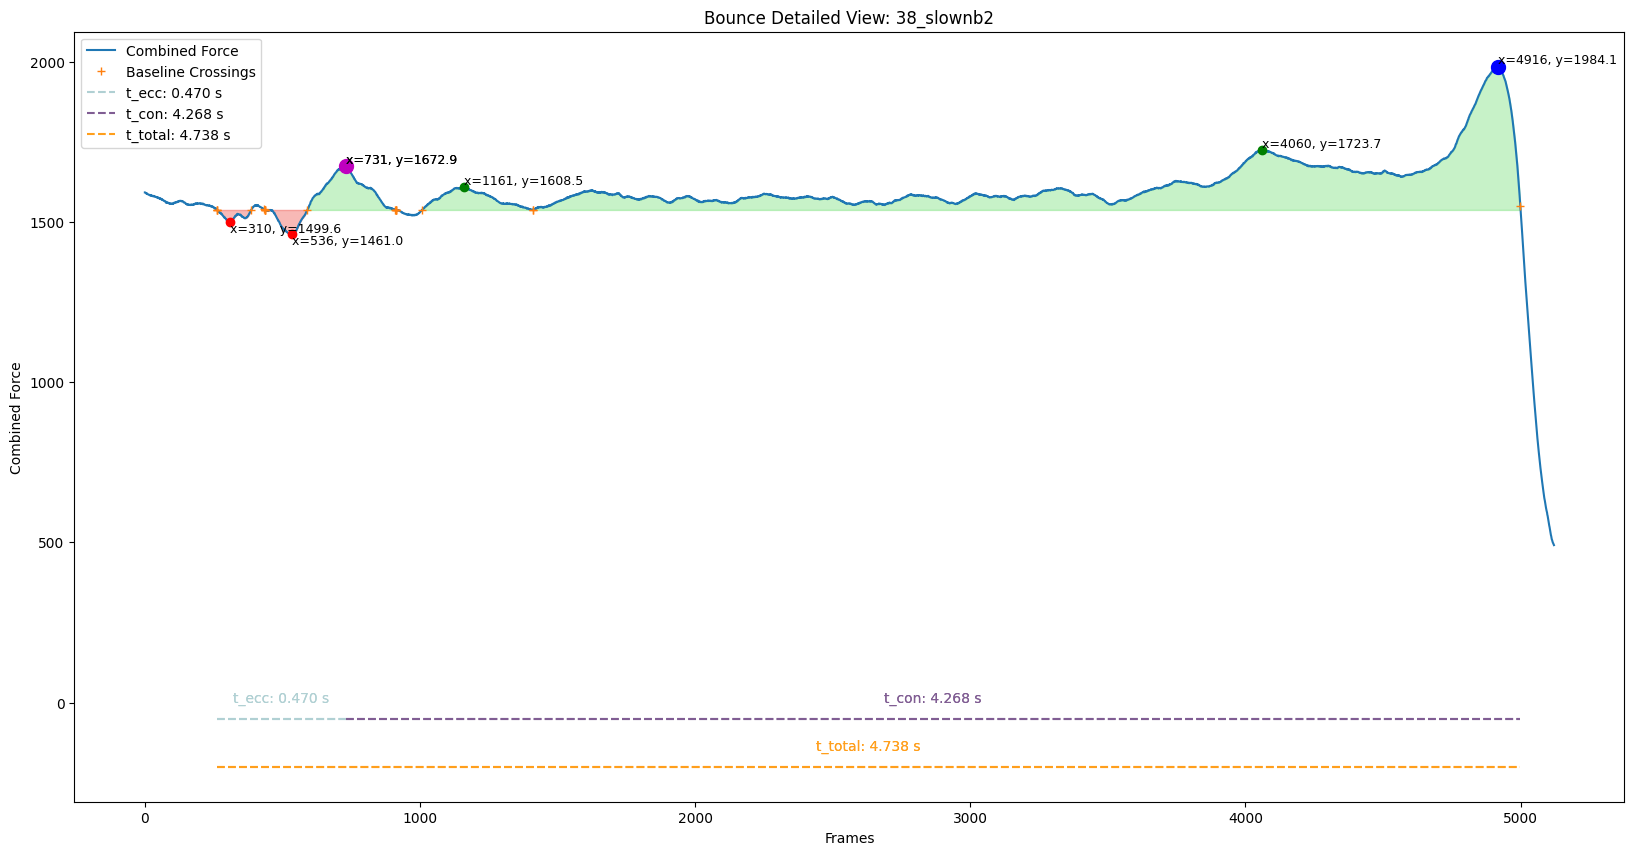

{'fps': 1000, 'source': 'fp', 'device': 'fp3d', 'gender': 'f', 'load': np.float64(85.0), 'bodyweight': np.float64(71.7)}


In [4]:
insight.plot_data(file_name='38_slownb2')